In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  accuracy_score,
  classification_report,
  confusion_matrix,
  roc_auc_score,
  roc_curve,
)
import statsmodels.formula.api as smf


## Notes
- For Part 1: Inference vs Prediction, I copied a lot from the previous lecture (6_Ploynomial_logistic_regression). Same Dataset, same data exploration. I think going over a seen example can help the students getting started again. On the other hand a different Dataset can help understanding the Tools more abstractly and in different examples. -> Open
- I guess the alzheimer dataset is simulated, because I think it does not make sense that people have weird float values as years of education no? Would it make sense to fix it? Same for the cognitive score
- We may need to change the dataset for prediction, because prediction on the alzheimer dataset is not working very well
- does the notebook need to be self explanatory?

# **Hands-On: Advanced Statistical Learning Concepts**
In this hands-on session, we will explore logistic regression for inference and prediction, polynomial regression for bias-variance trade-off, train-validate-test split and cross-validation, and visualizing loss function optimization. -> Update this summary once we have written the whole notebook

## **Table of Contents**

1. [Part A: Logistic Regression for Inference and Prediction](#part-a-logistic-regression-for-inference-and-prediction)
   - [Step 1: Load and Explore the Dataset](#step-1-load-and-explore-the-dataset)
   - [Step 2: Logistic Regression for Inference](#step-2-logistic-regression-for-inference)
   - [Step 3: Logistic Regression for Prediction](#step-3-logistic-regression-for-prediction)
2. [Part B: Polynomial Regression for Bias-Variance Trade-Off](#part-b-polynomial-regression-for-bias-variance-trade-off)
3. [Part C: Train-Validate-Test Split and Cross-Validation](#part-c-train-validate-test-split-and-cross-validation)
4. [Part D: Visualizing Loss Function Optimization](#part-d-visualizing-loss-function-optimization)
5. [Bonus](#bonus)

## **Logistic Regression for Inference and Prediction**
In the following part, we will explain the Characteristics and Differences between Inference and Prediction using Logistic Regression. We will use the same Dataset for both tasks. This is a Repition of last years Lecture on Polynomial and Logistic Regression (6_Polynomial_Logistic Regression)

### **Dataset Description**

This dataset contains **clinical and genetic data** for 1,000 individuals. The variables include:

- **Age**: Age of the participant (years).
- **Education**: Number of years of formal education.
- **APOE4**: Genetic marker indicating presence (1) or absence (0) of the APOE4 allele, a known genetic risk factor for Alzheimer's.
- **Cognitive_Score**: Score from a cognitive performance test.
- **Alzheimers**: Binary outcome variable indicating diagnosis of Alzheimer's disease (1 = Yes, 0 = No).

In [ ]:
# Load the dataset
data = pd.read_csv('alzheimer_logisticregression.csv')


In [ ]:
# Show the first few rows of the dataset
data.head()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
0,73.973713,18.198066,0,29.292511,0
1,68.893886,16.773901,0,19.856534,1
2,75.181508,14.178891,0,25.561481,0
3,82.184239,12.059190,0,28.204429,0
4,68.126773,16.094670,1,27.735338,0


In [ ]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   float64
 1   Education        1000 non-null   float64
 2   APOE4            1000 non-null   int64  
 3   Cognitive_Score  1000 non-null   float64
 4   Alzheimers       1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [ ]:
# Show statistical summary of the dataset
data.describe()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.154656,14.212509,0.194000,26.975131,0.090000
std,7.833728,2.992363,0.395627,4.146570,0.286325
min,44.069861,5.178834,0.000000,15.035456,0.000000
25%,64.819278,12.181275,0.000000,24.127411,0.000000
50%,70.202405,14.189231,0.000000,26.994565,0.000000
75%,75.183551,16.186647,0.000000,29.743589,0.000000
max,100.821852,23.579323,1.000000,42.704951,1.000000


In [ ]:
# Missing values check
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age                0
Education          0
APOE4              0
Cognitive_Score    0
Alzheimers         0
dtype: int64

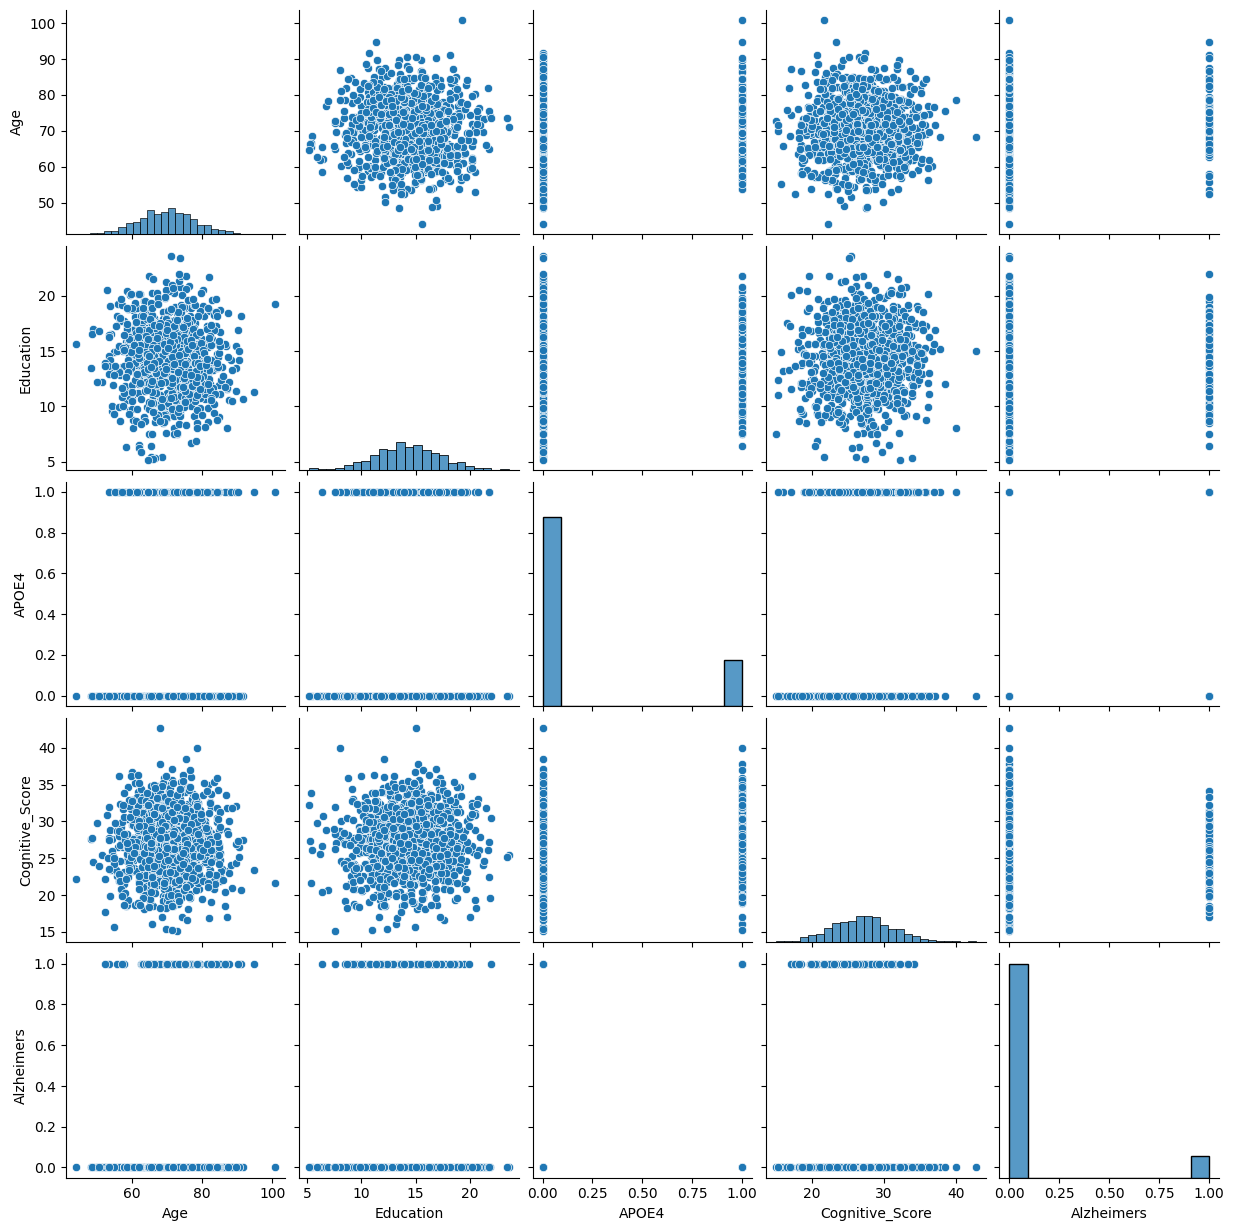

In [22]:
# Show the pairplot
sns.pairplot(data)

We see that the majority in this sample does not have Alzheimer, and the majority does not have the APOE4 allele. Otherwise, all continous variables seems normally distributed with no clear outliers visible.

## **Logistic Regression for Inference**

### **Research Question**

> **Which individual-level factors are significantly associated with the probability of developing Alzheimer's disease?**

This analysis aims to evaluate how **age**, **education**, **APOE4 gene status**, and **cognitive test scores** influence the probability of an Alzheimer's diagnosis, using **logistic regression**.

In [ ]:

# fit the logistic regression model using a formula
model = smf.logit('Alzheimers ~ Age + Education + APOE4 + Cognitive_Score', data=data).fit()


# Print the summary of the regression results
model.summary()


Optimization terminated successfully.
         Current function value: 0.282404
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Alzheimers   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                 0.06655
Time:                        14:20:02   Log-Likelihood:                -282.40
converged:                       True   LL-Null:                       -302.54
Covariance Type:            nonrobust   LLR p-value:                 3.811e-08
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7087      1.340     -2.022      0.043      -5.335      -0.083
Age                 0.0394      0.014      2.795      0.005       0.012       0.067
Education          -0.0207      0.038     -0.543      0.587      -0.096       0.054
APOE4               1.0785      0.238      4.538      0.000       0.613       1.544
Cognitive_Score    -0.0916      0.027     -3.332      0.001      -0.145      -0.038
===================================================================================
"""

### While the raw coefficients in logistic regression reflect changes in the log-odds of the outcome, these are not easy to interpret. **Therefore, we exponentiate the coefficients to express them as multiplicative changes in the odds of the outcome (i.e., $\frac{P(Y=1)}{1 - P(Y=1)}$)**.

In [ ]:
# Extract the coefficients
coefficients = model.params

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)
print("Change in Odds:\n", odds_ratios, "\n")

# Calculate percent change in odds
percent_change = (odds_ratios - 1) * 100
print("Percent change in Odds:\n", percent_change)

Change in Odds:
 Intercept          0.066623
Age                1.040222
Education          0.979497
APOE4              2.940204
Cognitive_Score    0.912497
dtype: float64 

Percent change in Odds:
 Intercept          -93.337657
Age                  4.022160
Education           -2.050347
APOE4              194.020361
Cognitive_Score     -8.750291
dtype: float64


### Logistic Regression Interpretation (Exponentiated Coefficients)
**Outcome: Diagnosis of Alzheimer’s Disease (1 = Alzheimer’s, 0 = No Alzheimer’s)**


- **Age**
  - Coefficient: 0.0394 → Odds Ratio: **1.040**
    - *Remember: Odds Ratio here refers to Odds of one unit increase / Odds*
  - Interpretation: Each additional year of age increases the odds of an Alzheimer’s diagnosis by **4.0%**.
  - P-value: 0.005 → **Statistically significant**

- **Education**
  - Coefficient: -0.0207 → Odds Ratio: **0.980**
  - Interpretation: Each additional year of education slightly reduces the odds of an Alzheimer’s diagnosis by **2.0%**, but this effect is **not statistically significant**.
  - P-value: 0.587

- **APOE4**
  - Coefficient: 1.0785 → Odds Ratio: **2.941**
  - Interpretation: Individuals with the APOE4 allele have **2.94 times higher odds** (or increased odds by 194%) of being diagnosed with Alzheimer’s.
  - P-value: 0.000 → **Highly statistically significant**

- **Cognitive Score**
  - Coefficient: -0.0916 → Odds Ratio: **0.913**
  - Interpretation: Each unit increase in cognitive score **reduces the odds** of an Alzheimer’s diagnosis by **8.7%**.
  - P-value: 0.001 → **Statistically significant**


## **Logistic Regression for Prediction**

Prediction focuses on building a model that generalizes well to unseen data, such as new patients. The primary goal is to accurately predict outcomes based on input features. Unlike inference, which emphasizes interpreting coefficients and their significance, prediction prioritizes the model's performance on left-out test data.

### **Research Question**

> **"How accurately can a logistic regression model predict the likelihood of Alzheimer's disease based on clinical and genetic features?"**

### Why Use `scikit-learn` for Prediction?

In this section, we use **`scikit-learn`** for building and evaluating the logistic regression model. While **`statsmodels`** is excellent for interpreting coefficients and statistical significance, **`scikit-learn`** is better suited for **prediction tasks** due to the following:

1. **Prediction Focus**: It’s optimized for evaluating models on unseen data.
2. **Ease of Use**: Built-in tools for train-test split, predictions, and performance metrics.
3. **Efficiency**: Handles larger datasets and faster computations.

Using **`scikit-learn`**, we focus on the practical application of logistic regression for predictive accuracy.

### Train-Test Split

To evaluate the performance of our prediction model, we divide the dataset into two parts: **training data** and **testing data**. The training data is used to build the model, while the testing data is kept aside to assess how well the model performs on unseen data. 

(Note: We will discuss the concept of train-test split and its importance in detail later.)

In [ ]:
# Step 1: Split the dataset into training and testing sets

# Define input (X) and target (y)
X = data[["Age", "Education", "APOE4", "Cognitive_Score"]]  # Input variables
y = data["Alzheimers"]  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# TODO: Add something like Alzheimers ~ "Age + Education + APOE4 + Cognitive_Score" to the model fitting
# Step 2: Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
# Step 3: Make predictions on the test data
y_pred = log_reg.predict(X_test)  # Predicted values
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

### Evaluating Performance

To assess the quality of our prediction model, we use the following metrics:

1. **Accuracy**: The proportion of correct predictions out of all predictions.
2. **Precision**: The proportion of correctly predicted positive cases out of all predicted positive cases.
3. **Recall (Sensitivity)**: The proportion of correctly predicted positive cases out of all actual positive cases.
4. **F1-Score**: The harmonic mean of precision and recall, useful when the dataset is imbalanced.
5. **ROC-AUC Score**: Measures the model’s ability to distinguish between classes (higher scores indicate better performance).

(Note: More details and the mathematical background of these metrics are provided in the Bonus section.)
TODO: Maybe add mathematics or some examples that it makes more sense. Also do we need all these metrics or is it enough if we skip through them?

In [ ]:

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### ROC Curve

The **ROC Curve** (Receiver Operating Characteristic Curve) is a graphical representation of a model's ability to distinguish between classes. It plots the **True Positive Rate (Sensitivity)** against the **False Positive Rate** at various threshold values. 

A key metric derived from the ROC Curve is the **AUC (Area Under the Curve)**, which quantifies the overall ability of the model to separate the classes (higher is better). 

(Note: Details on how the ROC Curve is computed are provided in the Bonus section.)

In [ ]:

# Step 5: Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Overview: Inference vs Prediction
| Aspect               | Inference                                      | Prediction                                   |
|----------------------|------------------------------------------------|---------------------------------------------|
| **Goal**            | Understand relationships between variables   | Build a model to predict new outcomes       |
| **Focus**           | Coefficients and their significance          | Model performance metrics (e.g., accuracy)  |
| **Data**            | Entire dataset                              | Train-test split                            |
| **Evaluation**      | Statistical significance tests              | Metrics like ROC-AUC, precision, recall     |

Inference helps us understand the underlying relationships in the data, while prediction focuses on making accurate forecasts for new observations.

# Polynomial Regression for Bias-Variance Trade-Off

### What is Polynomial Regression?
Polynomial regression is an extension of linear regression that allows us to model non-linear relationships by adding polynomial terms (squared, cubed, etc.) of the predictor variable (e.g., **Age**). This makes it possible to capture more complex trends in the data.

### What is Bias-Variance Tradeoff?
When fitting a model, we balance two key sources of error:
- **Bias**: The error introduced by assuming a simple model (e.g., linear) that cannot capture the true relationship in the data.
- **Variance**: The error introduced by fitting a model that is too complex and overly sensitive to small fluctuations in the training data (**overfitting**).

### Why Does This Matter in Healthcare?
In healthcare, understanding trends (like how ferritin levels change with age) is critical for deriving insights and making decisions. **Overfitting** can lead to models that describe noise instead of meaningful patterns, which can mislead clinical interpretations. The goal is to find a balance between underfitting and overfitting to make accurate and reliable predictions.

## 2. Practical Explanation Using Ferritin Data

### Key Idea to Convey
By fitting polynomial regressions of increasing degrees to the **Ferritin-Age** data, we can:
- Visualize how simple models fail to capture the curvature (**underfitting**).
- Observe how overly complex models capture noise instead of the true trend (**overfitting**).

The **optimal degree** of the polynomial is the one that minimizes the error on unseen data (**test set**), achieving a balance between bias and variance.

### Data Description

The dataset includes measurements of **Ferritin concentration** in males across a continuous age range from **10 to 99 years**. Each observation consists of:

- `Age`: A continuous numeric variable representing the age of the individual (in years).
- `Ferritin`: A numeric variable representing ferritin concentration levels (in µg/L), a biomarker commonly used to assess iron status in the body.


In [ ]:
df = pd.read_csv('ferritin_polynomialregression.csv')


In [ ]:
df.head()

,Age,Ferritin
0,10.00000,63.957623
1,10.89899,54.805533
2,11.79798,64.997034
3,12.69697,81.943111
4,13.59596,82.453116


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       100 non-null    float64
 1   Ferritin  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,Age,Ferritin
count,100.000000,100.000000
mean,54.500000,137.765925
std,26.081038,31.283258
min,10.000000,54.805533
25%,32.250000,119.144039
50%,54.500000,148.927937
75%,76.750000,162.426412
max,99.000000,185.465056


In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Age         0
Ferritin    0
dtype: int64

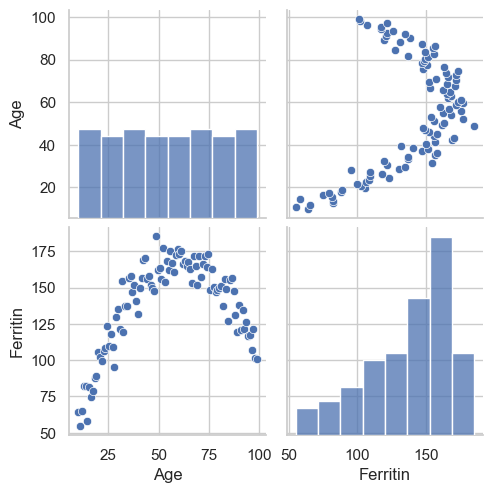

In [ ]:
sns.pairplot(df)

We clearly see that there is a non-linear relationship (inverted U-shape) between Ferritin and Age. **Nevertheless, we first fit a linear regression model.**

## Bias

In [ ]:
# Fit a linear model to different subsets of the data and show that they differ not a lot, but doen't fit the data well

## Variance

In [ ]:
# Fit a polynomial regression model to different subsets of the data and show that they differ a lot, but fit the data well

## Bias-Variance Tradeoff Overview

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Polynomial regression function
def fit_and_plot_polynomial(data, degrees):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(data[["Age"]])
        model = LinearRegression().fit(X_poly, data["Ferritin"])
        predictions = model.predict(X_poly)
        
        # Plot the polynomial fit
        plt.plot(data["Age"], predictions, label=f"Degree {degree}")
    
    plt.title("Polynomial Fits of Increasing Degree")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend()
    plt.show()

# Fit and plot for degrees 1, 3, 5, and 10
fit_and_plot_polynomial(data, degrees=[1, 3, 5, 10])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[["Age"]]
y = data["Ferritin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate MSE for different polynomial degrees
train_errors = []
test_errors = []

for degree in range(1, 11):  # Degrees 1 to 10
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the errors
plt.plot(range(1, 11), train_errors, label="Training Error", marker="o")
plt.plot(range(1, 11), test_errors, label="Testing Error", marker="o")
plt.title("Train vs. Test Error (Bias-Variance Tradeoff)")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

## Part C: Train-Validate-Test Split and Cross-Validation
Learn how to split data and perform cross-validation using scikit-learn.

## Part D: Visualizing Loss Function Optimization
Visualize the optimization process of loss functions using RMSE.

## Bonus

•	Function mapping features to outcomes Y~f(X)+e
o	non-/parametric functions
